# Main AIRBNB CHALLENGE

Pipeline:
    1. Data exploration and cleaning
    2. Machine learning preprocessing
    3. Machine learning optimization
    4. Results
    


## 1. Data exploration and cleaning
### 1.1 file 'train_users_2.csv' and 'test_users.csv'

*expliquer les fichiers et le traitements qui sera effectué ici*

In [1]:
import pandas as pd
import preprocessing_helper as preprocessing_helper

In [2]:
df = pd.read_csv("train_users_2.csv")
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


**There are missing values in the columns : **

* date_first_booking : users that never booked an airbnb apartment
* gender : users that didn't wish to specify their gender
* age : users that didn't wish to specify their age
* first_affiliate_tracked : problem of data

In [3]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

#### Ages
Ages are represented in two ways in the dataset, some data represent the age and some oters represent the date of birth. 

Also, many irrelevant ages are present or inexistant.

For the relevancy of the data we will keep users between the age of 15 and 90 years old, and those who specified their age, but **we will assign a value of -1**

A first step is to include users having 2016-age belonging to [15,90] (users that mistook their age with date of birth)

In [4]:
df = preprocessing_helper.cleanAge(df,'a')

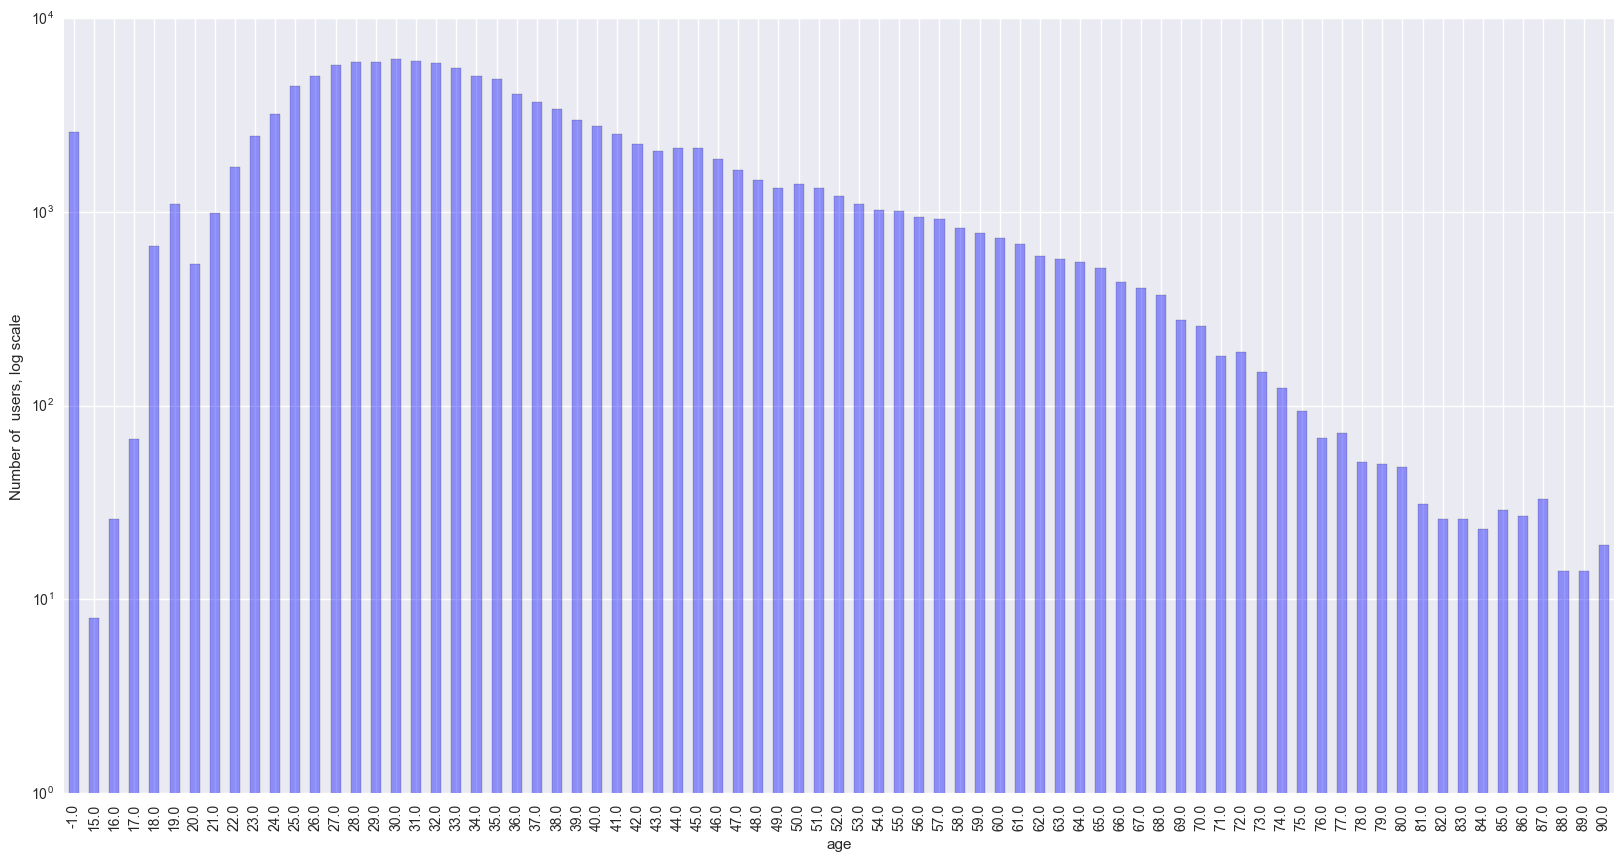

In [5]:
preprocessing_helper.plotAge(df)

### Gender

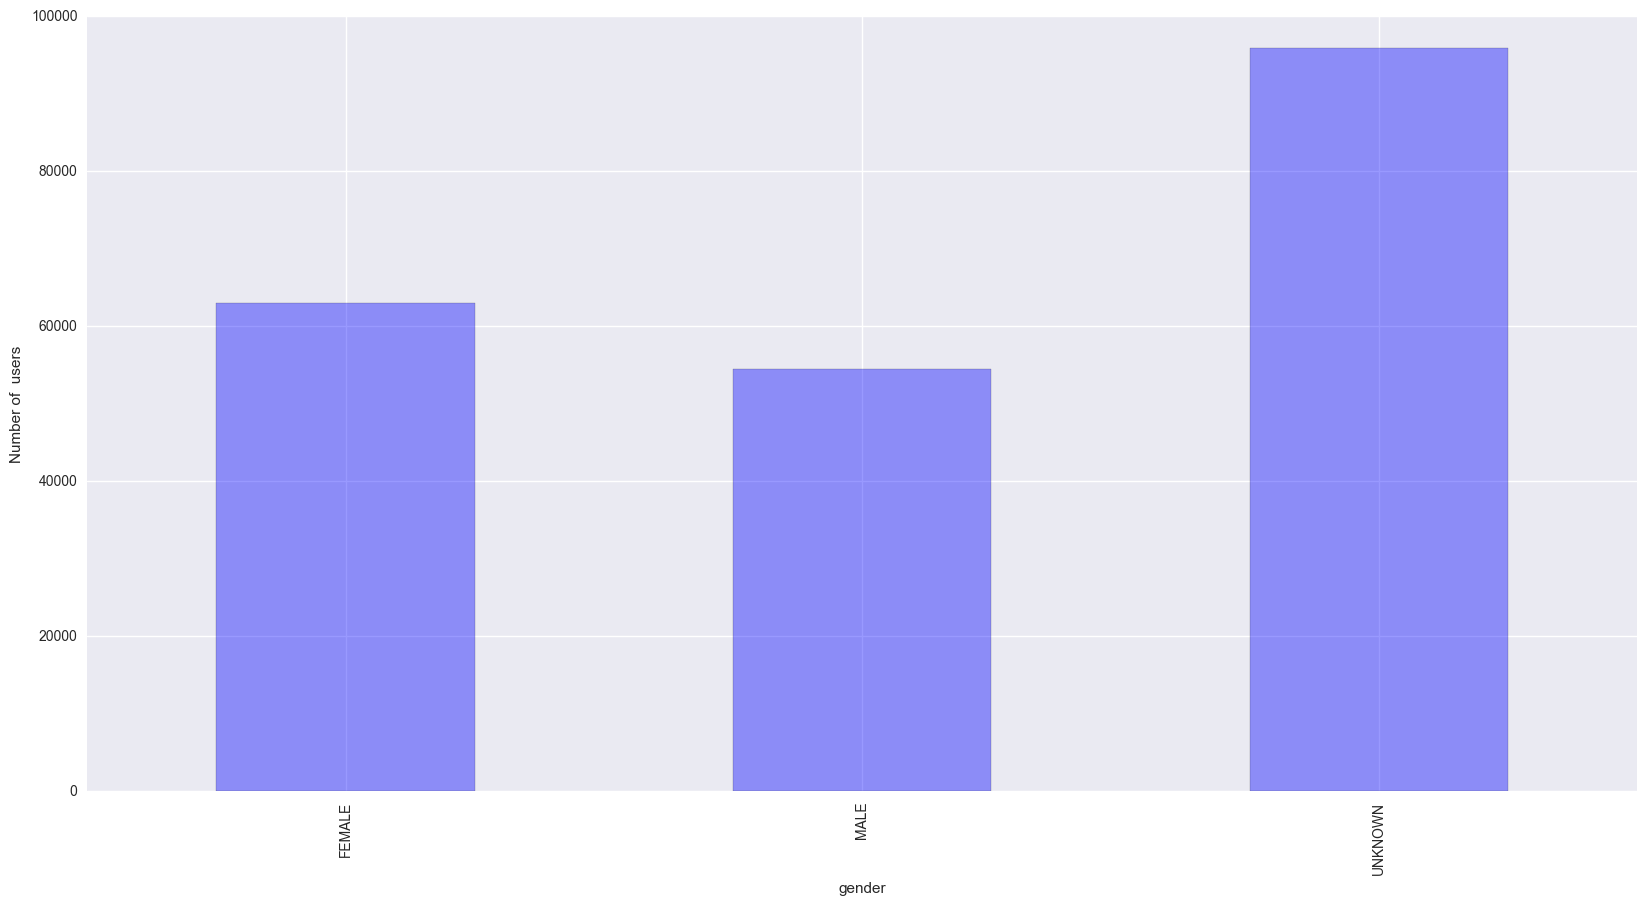

In [6]:
df = preprocessing_helper.cleanGender(df)
preprocessing_helper.plotGender(df)

#### first_affiliate_tracked feature

In [7]:
df = preprocessing_helper.cleanFirst_affiliate_tracked(df)

#### Date_first_booking

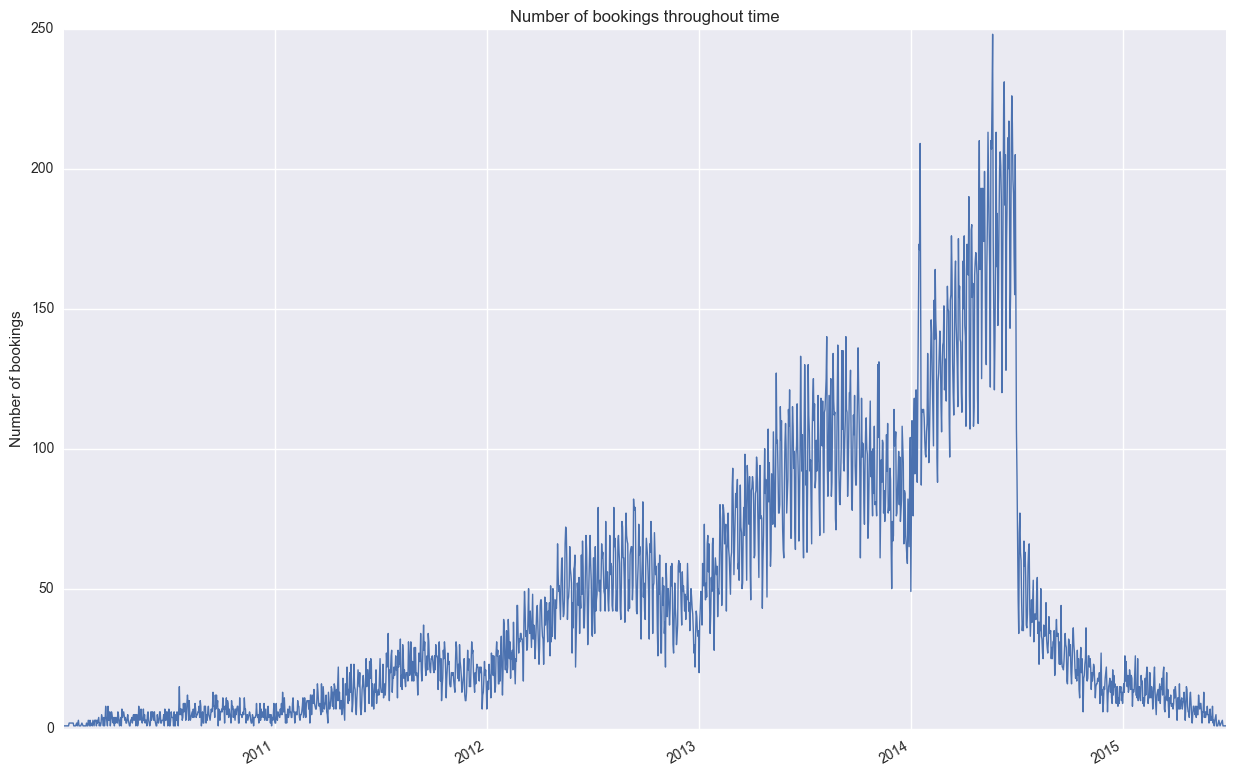

In [8]:
df = preprocessing_helper.cleanDate_First_booking(df)
preprocessing_helper.plotDate_First_booking_years(df)

- This has a high similarity with the dates where accounts were created. Despite the high growth of airbnb bookings throughout the years, it is possible to see that the difference between the months increases over the years as each year parabol curve increases.
- By studying each year independently, we could see that four peaks arise each month corresponding to a certain day in the week. The following plots will show the **bookings distribution** over the **months** and later over the **week**

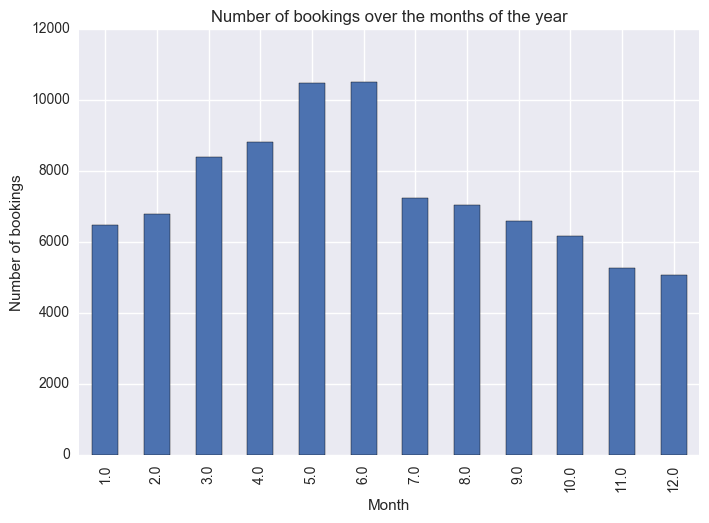

In [9]:
preprocessing_helper.plotDate_First_booking_months(df)

It is possible to understand from this histogram that the bookings are pretty well spread over the year. Much less bookings are made during november and december and the months of May and June are the ones where users book the most.

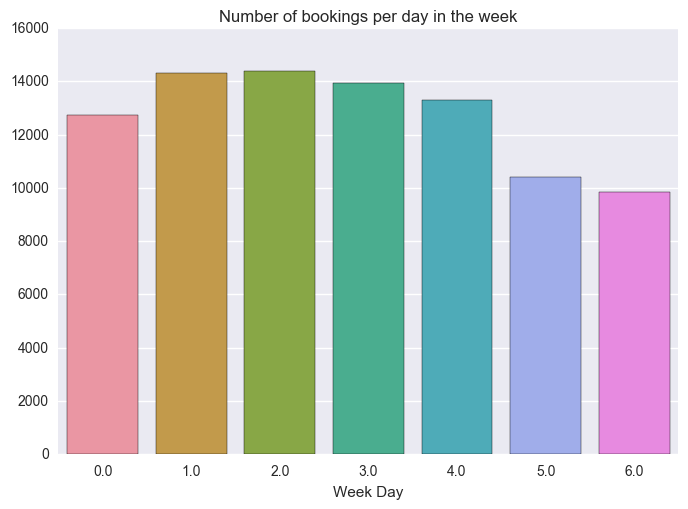

In [10]:
week = preprocessing_helper.computeDate_First_booking_weekdays(df)
preprocessing_helper.plotDate_First_booking_weekdays(week)

As for the day where most accounts are created, it seems that **tuesday and wednesdays** are the days where people book the most appartments on Airbnb.

#### Save cleaned and explored file

In [11]:
preprocessing_helper.saveFile(df, 'cleaned_train_user.csv')

file saved


### 1.2 file 'test_user.csv'

This file has a similar structure than train_user_2.csv, so here, we will just do the cleaning process here.

In [12]:
df = pd.read_csv("test_users.csv")
df = preprocessing_helper.cleanAge(df,'a')
df = preprocessing_helper.cleanGender(df)
df = preprocessing_helper.cleanFirst_affiliate_tracked(df)
preprocessing_helper.saveFile(df, 'cleaned_test_user.csv')

file saved


### 1.3 file 'age_gender_bkts.csv'
- age_groups : from 0 to 100+, 5 years old size
- Country destination : there are 12 countries with the following mapping:
    - 'AU' = Australia
    - 'ES' = Spain
    - 'PT' = Portugal
    - 'US' = USA
    - 'FR' = France
    - 'CA' = Canada
    - 'GB' = Great Britain
    - 'IT' = Italy
    - 'NL' = Netherlands
    - 'DE' = Germany
    - 'NDF'= No distantion found



In [13]:
df = pd.read_csv("age_gender_bkts.csv")
df.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


#### Proportion of travelers given the age group and sex per country
proportion = number of travelers / total travelers in **this** country

**Assumption : ** We are going to remove ages above 90 and below 15 years old.

In [14]:
df = preprocessing_helper.cleanAgeBucket(df)

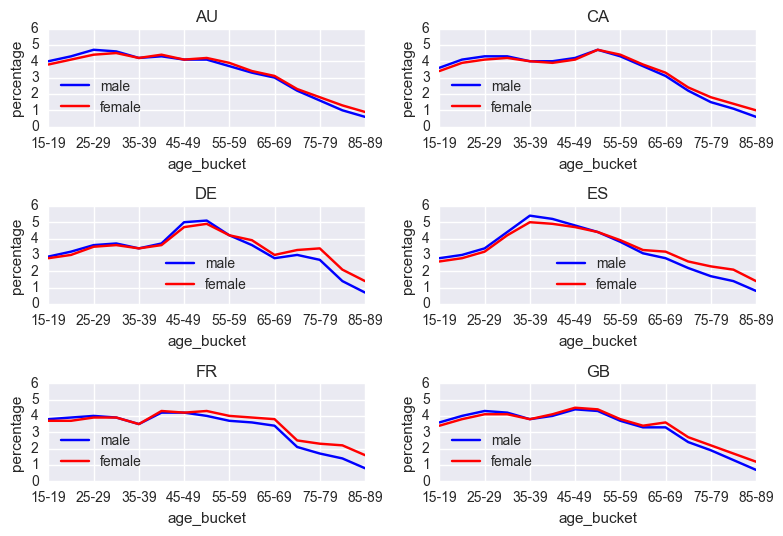

In [15]:
df_destination_age_male,df_destination_age_female,df_destination_total = preprocessing_helper.travellerCountryProcess(df)
preprocessing_helper.travellerProportionCountryPlot(df_destination_age_male,df_destination_age_female)

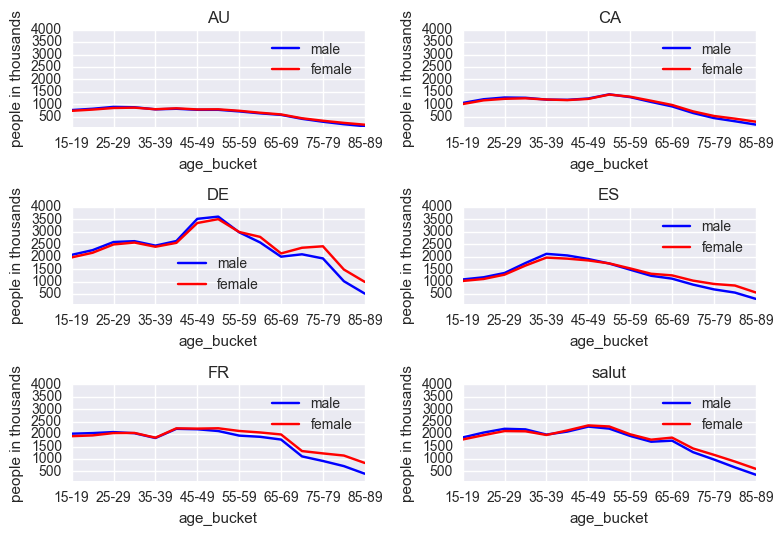

In [16]:
preprocessing_helper.travellerNumberCountryPlot(df_destination_age_male,df_destination_age_female)

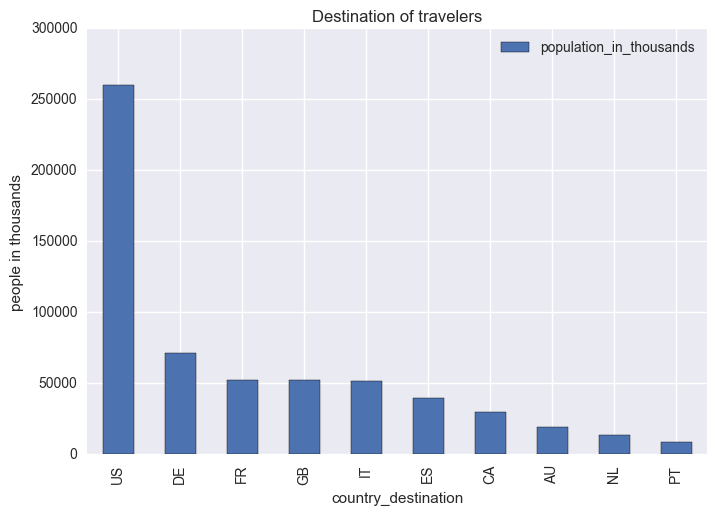

In [17]:
preprocessing_helper.destinationTotalPlot(df_destination_total)